<a href="https://colab.research.google.com/github/MichaelSeitz98/seminararbeit_review_detection/blob/main/real_fake_image_detector_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import urllib
import os
from fastai.vision.all import *
from fastdownload import download_url

In [24]:
%cd /content/drive/MyDrive/review_detecion

/content/drive/MyDrive/review_detecion


In [37]:
path = Path('/content/drive/MyDrive/review_detecion/train')
fns = get_image_files(path)
fns

(#1464) [Path('/content/drive/MyDrive/review_detecion/train/train_fake_images_not_in_base/100_ChZDSUhNMG9nS0VJQ0FnSURzamJqeWFREAE_fake_reviewImageUrls_0.png'),Path('/content/drive/MyDrive/review_detecion/train/train_fake_images_not_in_base/101_ChZDSUhNMG9nS0VJQ0FnSUNoOVBIX1h3EAEF_fake_reviewImageUrls_1.png'),Path('/content/drive/MyDrive/review_detecion/train/train_fake_images_not_in_base/101_ChZDSUhNMG9nS0VJQ0FnSUNoOVBIX1h3EAE_fake_reviewImageUrls_0.png'),Path('/content/drive/MyDrive/review_detecion/train/train_fake_images_not_in_base/0_ChZDSUhNMG9nS0VJQ0FnSURJanBQb1pBEAE_fake_reviewImageUrls_0.png'),Path('/content/drive/MyDrive/review_detecion/train/train_fake_images_not_in_base/100_ChZDSUhNMG9nS0VJQ0FnSURzamJqeWFREAEF_fake_reviewImageUrls_1.png'),Path('/content/drive/MyDrive/review_detecion/train/train_fake_images_not_in_base/154_ChZDSUhNMG9nS0VJQ0FnSUM4X0otYkhnEAE_fake_reviewImageUrls_0.png'),Path('/content/drive/MyDrive/review_detecion/train/train_fake_images_not_in_base/13_ChZDSUh

In [5]:
failed = verify_images(fns)
print(failed)
if len(failed) > 0:
    failed.map(Path.unlink);
else:
    print("All images verified successfully.")

[]
All images verified successfully.


In [6]:
classes = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(256))

print("Done with creating DataBlock.")

Done with creating DataBlock.


Train items: 642
Valid items: 160


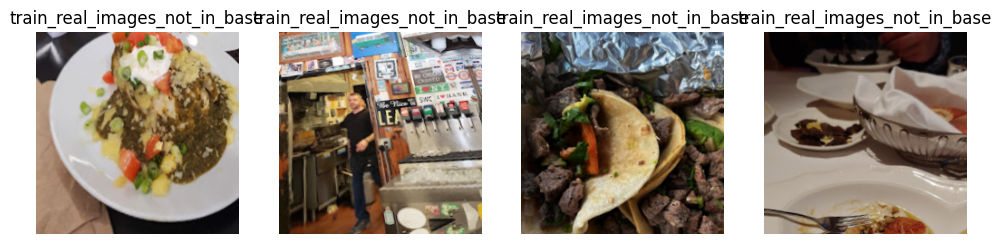

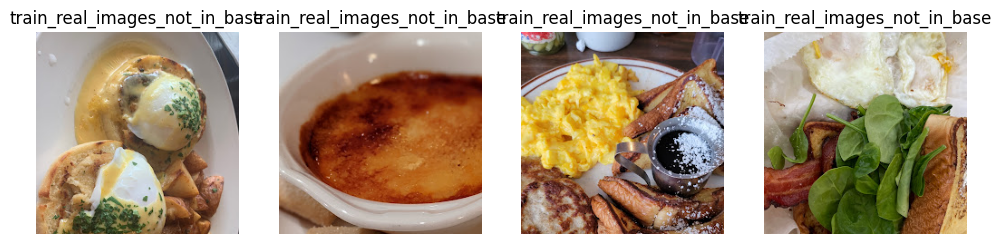

In [8]:
dls = classes.dataloaders(path)

print(f"Train items: {len(dls.train.items)}")
print(f"Valid items: {len(dls.valid.items)}")
dls.train.show_batch(max_n=4, nrows=1)
dls.valid.show_batch(max_n=4, nrows=1)

In [9]:
classes = classes.new(item_tfms=Resize(256, ResizeMethod.Squish))
dls = classes.dataloaders(path)

classes = classes.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [12]:
dls = classes.dataloaders(path)
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(epochs = 4, freeze_epochs=1)


epoch,train_loss,valid_loss,error_rate,time
0,1.264584,0.567706,0.281250,00:07


epoch,train_loss,valid_loss,error_rate,time
0,1.085757,0.598002,0.300000,00:05
1,1.003622,0.658543,0.350000,00:06
2,0.913260,0.485327,0.218750,00:08
3,0.878058,0.422220,0.168750,00:06


Die Bilder mit den schlechtesten loss Werte.


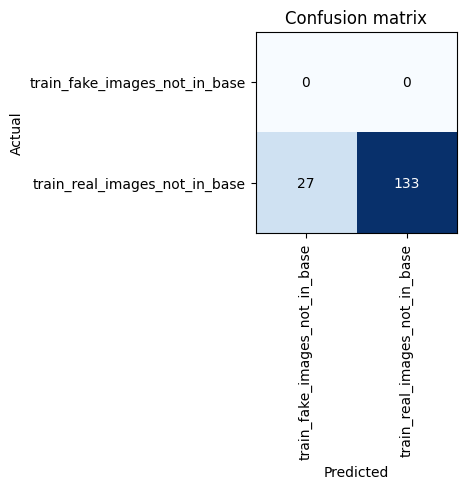

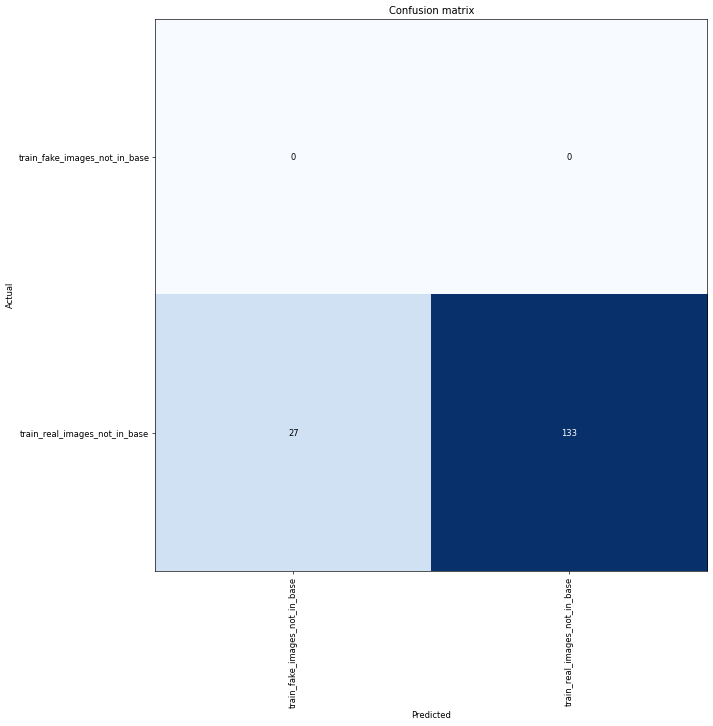

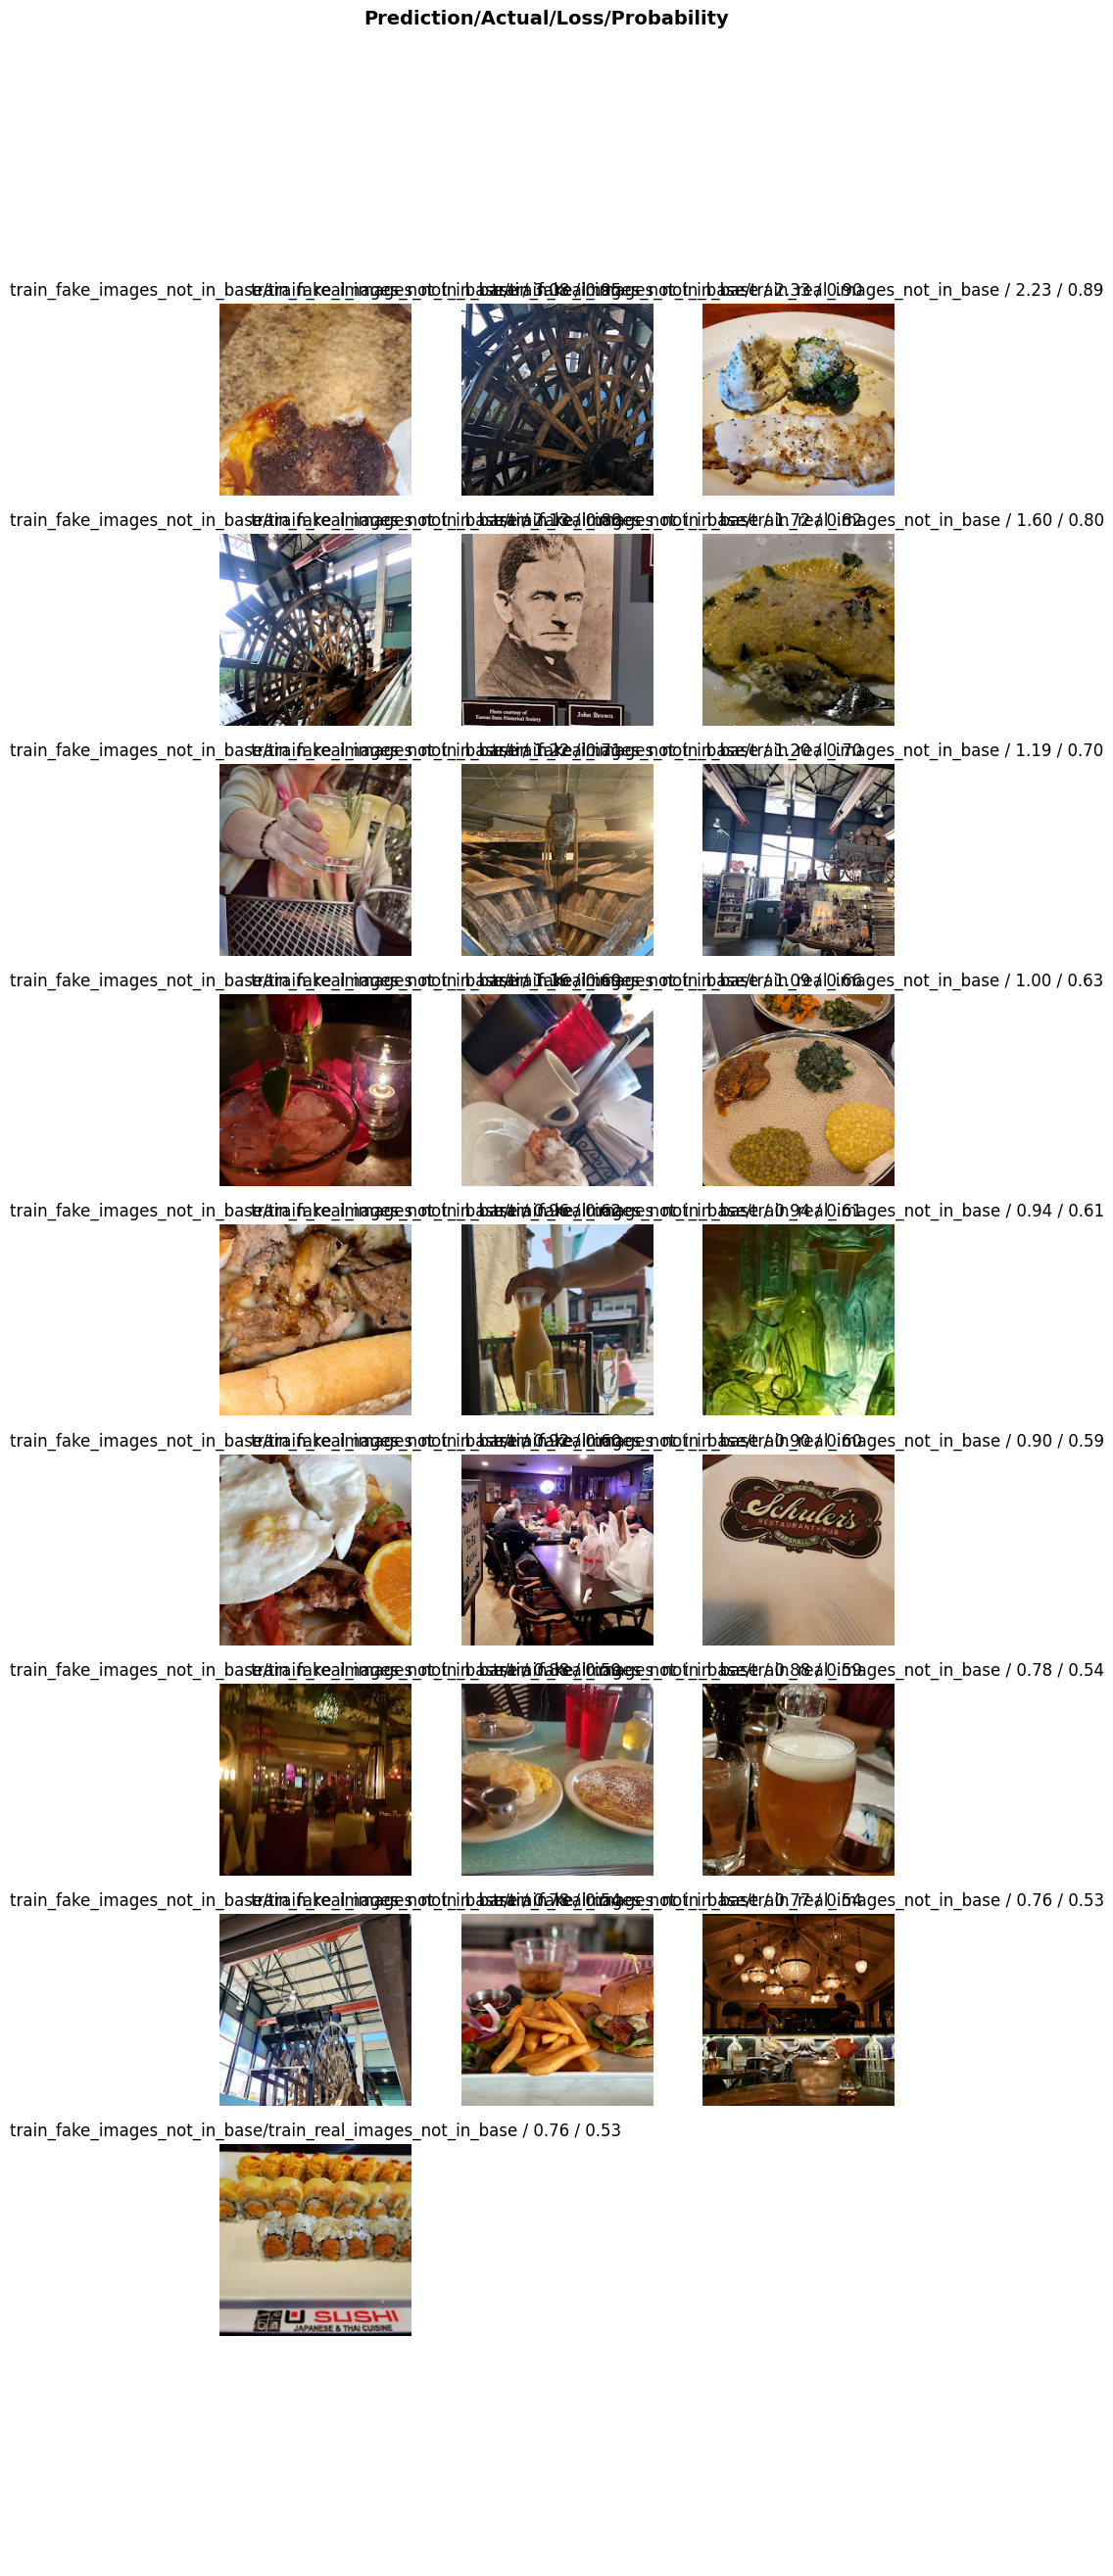

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
plt.savefig('image_classificator_confusion_matrix.svg', format='svg', dpi=1200)
print("Die Bilder mit den schlechtesten loss Werte.")
interp.plot_top_losses(25, nrows=10)

In [16]:
learn.export()

In [19]:
path.ls?

In [18]:
path = Path("/content/drive/MyDrive/review_detecion")
path.ls(file_exts='.pkl')

(#1) [Path('/content/drive/MyDrive/review_detecion/export.pkl')]